In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
I=np.array([
    0.01596, 0.01586, 0.01576, 0.01554, 0.01495, 0.01459, 0.01423, 0.01407, 0.01328, 0.01299,
    0.01271, 0.01259, 0.01196, 0.01138, 0.01086, 0.01039, 0.00995, 0.00956, 0.00885, 0.00824,
    0.0077, 0.00724, 0.00682, 0.0053, 0.00435, 0.00367, 0.00318, 0.0028, 0.00251, 0.00227
]) # mA

V=np.array([
    11.9, 11.82, 11.75, 11.59, 11.16, 10.89, 10.63, 10.51, 9.93, 9.71,
    9.1, 9.42, 8.95, 8.53, 8.14, 7.79, 7.46, 7.17, 6.65, 6.19,
    5.79, 5.44, 5.13, 4, 3.28, 2.78, 2.41, 2.12, 1.91, 1.72
]) # VOLTS

In [4]:
R12V=  [
    0, 5, 10, 20, 50, 70, 90, 100, 150, 170,
    190, 200, 250, 300, 350, 400, 450, 500, 600, 700,
    800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500
] # ohm

El valor de Rv que minimiza χ² es: 746.3312624798627 [Ω]
El valor de Rv que minimiza χ²  es: 746.3312624798627 [Ω]
χ² reducido: 0.005837827983770426
El valor mínimo del χ² es: 0.17513483951311276


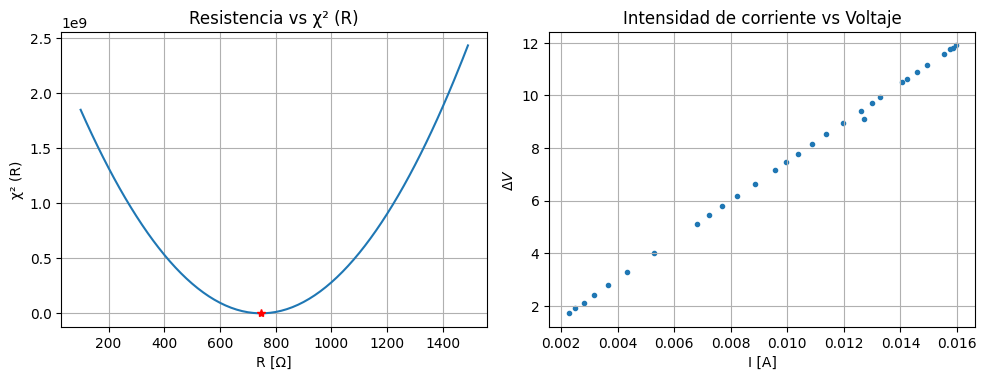

In [7]:
xi2=[]
Re_v=[]
V_t1=[]
Mod=[]
for Rv in range(100,1500,10):
    j=0.00451
    xi=(sum((np.array(V)-np.array(I)*Rv))**2/j**2)
    xi2.append(xi)
    Re_v.append(Rv)
    Mod.append(np.array(I)*Rv)
# Función objetivo que se debe minimizar
def modelo(Rv):
    return np.sum((V - I * Rv)**2)
# Establecer un valor inicial para Rv
valor_inicial_Rv = 100  # Valor Resistencia dada por fabricante
# Utilizar minimize para encontrar Rv que minimice la función objetivo
resultado = optimize.minimize(modelo, valor_inicial_Rv)
# El valor de Rv que minimiza la función objetivo
Rv_min = resultado.x[0]
print("El valor de Rv que minimiza \u03C7\u00B2 es:", Rv_min,"[\u03A9]")
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.plot(Re_v,xi2,Rv_min,0, '*r')
#plt.plot(Rv_min,0, '*g')
plt.grid(True)
plt.xlabel("R [\u03A9]")
plt.ylabel("\u03C7\u00B2 (R)")
plt.title("Resistencia vs \u03C7\u00B2 (R)")
#plt.figure(figsize=(5,3))
plt.subplot(2,2,2)
plt.scatter(I,V,marker=".")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$')
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.tight_layout()

# Calcular chi cuadrado reducido
xi2= modelo(Rv_min)
grados_de_libertad = len(V) - 1
xi_red = xi2 / len(V)
xi2_min=resultado.fun
print("El valor de Rv que minimiza \u03C7\u00B2  es:", Rv_min, "[Ω]")
print("\u03C7\u00B2 reducido:", xi_red)
# Xi cuadrado minimo
xi2_min = resultado.fun
print("El valor mínimo del \u03C7\u00B2 es:", xi2_min)